In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [21]:
n = 608
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

In [22]:
 # OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []


In [23]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=butaritari
Processing Record 2 of Set 1 | morgantown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=morgantown
Processing Record 3 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hilo
Processing Record 4 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=punta%20arenas
Processing Record 5 of Set 1 | karakol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=karakol
Processing Record 6 of Set 1 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nishihara
Processing Record 

Processing Record 3 of Set 2 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=broome
Processing Record 4 of Set 2 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=shimoda
Processing Record 5 of Set 2 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vanimo
Processing Record 6 of Set 2 | tirthahalli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tirthahalli
Processing Record 7 of Set 2 | barhi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=barhi
Processing Record 8 of Set 2 | curaca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=curaca
Processing Record 9 of Set 2 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 5 of Set 3 | sterling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sterling
Processing Record 6 of Set 3 | lakes entrance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lakes%20entrance
Processing Record 7 of Set 3 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vaini
Processing Record 8 of Set 3 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kavieng
Processing Record 9 of Set 3 | ratnagiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ratnagiri
Processing Record 10 of Set 3 | londiani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=londiani
Processing Record 11 of Set 3 | acarau
http://api.openweathermap.org/data/2.5/w

Processing Record 8 of Set 4 | zhucheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=zhucheng
Processing Record 9 of Set 4 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dikson
Processing Record 10 of Set 4 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=san%20cristobal
Processing Record 11 of Set 4 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=arraial%20do%20cabo
Processing Record 12 of Set 4 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ribeira%20grande
Processing Record 13 of Set 4 | jabiru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jabiru
City not found. Skipping...
Processing Record 14

Processing Record 10 of Set 5 | kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kiama
Processing Record 11 of Set 5 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lorengau
Processing Record 12 of Set 5 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saldanha
Processing Record 13 of Set 5 | kindu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kindu
Processing Record 14 of Set 5 | eydhafushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=eydhafushi
Processing Record 15 of Set 5 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=portland
Processing Record 16 of Set 5 | fasa
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 13 of Set 6 | aden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=aden
Processing Record 14 of Set 6 | constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=constitucion
Processing Record 15 of Set 6 | lloydminster
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lloydminster
Processing Record 16 of Set 6 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nanortalik
Processing Record 17 of Set 6 | tarakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tarakan
Processing Record 18 of Set 6 | san vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=san%20vicente
Processing Record 19 of Set 6 | sao filipe
http://api.openweathe

Processing Record 15 of Set 7 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bethel
Processing Record 16 of Set 7 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=naze
Processing Record 17 of Set 7 | hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hay%20river
Processing Record 18 of Set 7 | saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint-georges
Processing Record 19 of Set 7 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mahebourg
Processing Record 20 of Set 7 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vostok
Processing Record 21 of Set 7 | bairiki
http://api.openweathermap.org/data/2.5/wea

Processing Record 17 of Set 8 | kalanguy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kalanguy
Processing Record 18 of Set 8 | chipiona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=chipiona
Processing Record 19 of Set 8 | burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=burnie
Processing Record 20 of Set 8 | kralendijk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kralendijk
Processing Record 21 of Set 8 | wattegama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=wattegama
Processing Record 22 of Set 8 | tharad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tharad
Processing Record 23 of Set 8 | qaqortoq
http://api.openweathermap.org/data/2.5/weat

Processing Record 21 of Set 9 | owasso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=owasso
Processing Record 22 of Set 9 | canitas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=canitas
City not found. Skipping...
Processing Record 23 of Set 9 | samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=samusu
City not found. Skipping...
Processing Record 24 of Set 9 | bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bulgan
Processing Record 25 of Set 9 | seinajoki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=seinajoki
City not found. Skipping...
Processing Record 26 of Set 9 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=marzuq
Processing Rec

Processing Record 23 of Set 10 | bonham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bonham
Processing Record 24 of Set 10 | coos bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=coos%20bay
Processing Record 25 of Set 10 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=berlevag
Processing Record 26 of Set 10 | tabas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tabas
Processing Record 27 of Set 10 | rawannawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rawannawi
City not found. Skipping...
Processing Record 28 of Set 10 | fairview
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=fairview
Processing Record 29 of Set 10 | santa lucia
http://ap

Processing Record 25 of Set 11 | dong hoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dong%20hoi
Processing Record 26 of Set 11 | algiers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=algiers
Processing Record 27 of Set 11 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sibolga
Processing Record 28 of Set 11 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bolungarvik
City not found. Skipping...
Processing Record 29 of Set 11 | busok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=busok
Processing Record 30 of Set 11 | winona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=winona
Processing Record 31 of Set 11 | el tigre
http://api.o

Processing Record 28 of Set 12 | tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tateyama
Processing Record 29 of Set 12 | aberdeen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=aberdeen
Processing Record 30 of Set 12 | rumuruti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rumuruti
Processing Record 31 of Set 12 | nong khae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nong%20khae
Processing Record 32 of Set 12 | pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pierre
Processing Record 33 of Set 12 | bom jesus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bom%20jesus
Processing Record 34 of Set 12 | jabinyanah
http://api.openweathermap.or

## Perform API Calls

In [24]:
city_data = pd.DataFrame(city_data)
lats = city_pd['Lat']
max_temp = city_pd['Max Temp']
humidity = city_pd['Humidity']
cloudiness = city_pd['Cloudiness']
wind_speed = city_pd['Wind Speed']

city_data.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [25]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,12,KI,1536463402,100,3.07,172.79,84.32,10.42
1,morgantown,90,US,1536462240,93,39.63,-79.96,60.08,4.70
2,hilo,40,US,1536461760,71,19.71,-155.08,82.04,8.05
3,punta arenas,0,CL,1536458400,60,-53.16,-70.91,42.80,12.75
4,karakol,20,KG,1536463404,55,42.49,78.39,48.41,3.15


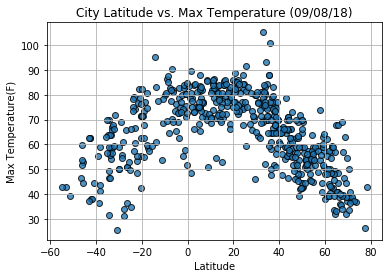

In [27]:
plt.scatter(lats,
           max_temp,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8,label='Cities')
plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data_fig1.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/fig2.png'

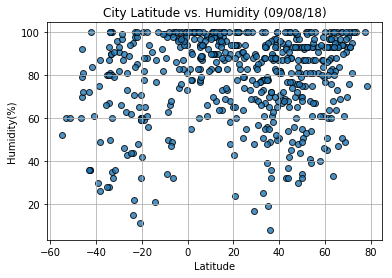

In [28]:
plt.scatter(lats,
           humidity,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8,label='Cities')
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data/fig2.png')
plt.show()

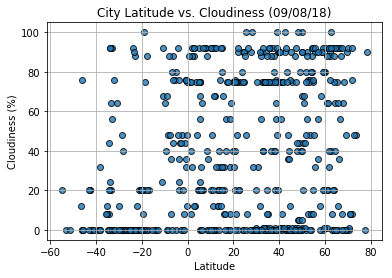

In [29]:
plt.scatter(lats,
           cloudiness,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8,label='Cities')
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data_fig3.png')
plt.show()

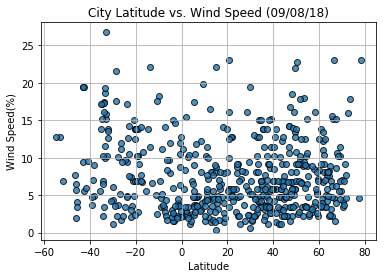

In [30]:
plt.scatter(lats,
           wind_speed,
           edgecolor='black',linewidths=1,marker='o',
           alpha=0.8,label='Cities')
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed(%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data_fig3.png')
plt.show()